# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt     # for creating plots
import pandas as pd                 # for handling and structuring data
import numpy as np                  # for generating random numbers and handling numerical operations
import requests                     # for API calls
import time                         # for adding delays to API calls - to prevent charges
from scipy.stats import linregress  # for calculating linear regression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key  # for authenticating requests to the OpenWeather API

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy           # library 

import json
from pprint import pprint           # adding because I like pretty print!

# import datetime to convert the unix timestamp from the dataset
from datetime import datetime 

### Generate the Cities List by Using the `citipy` Library

In [63]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Defining the range of latitudes and longitudes
lat_range = (-90, 90)     # -90 (South Pole) to 90 (North Pole)
lng_range = (-180, 180)   # -180 (westernmost point) to 180 (easternmost point)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)   # generates 1500 random latitude values
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)   # generates 1500 random longtude values
lat_lngs = zip(lats, lngs)     # pairs each latitude with it's corresponding longitude - a tuple!

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list  -- eliminates duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [64]:
# begin with looking at the weather data for a specific city to get a general understanding of the data

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with city
city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

# pick an example city
city = "Minneapolis"

# send an API request and convert it into a python dictionary (JSON format)
city_weather = requests.get(city_url).json() 

pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 60.7161, 'lon': -135.0538},
 'dt': 1738524684,
 'id': 6180550,
 'main': {'feels_like': -26.48,
          'grnd_level': 957,
          'humidity': 76,
          'pressure': 1042,
          'sea_level': 1042,
          'temp': -19.7,
          'temp_max': -18.88,
          'temp_min': -19.83},
 'name': 'Whitehorse',
 'sys': {'country': 'CA',
         'id': 47668,
         'sunrise': 1738516474,
         'sunset': 1738545199,
         'type': 2},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 350, 'speed': 2.57}}


In [65]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters to track the progress
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
                     #api key               &query = the city we're looking for
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"  # put in metric so the data comes as Celsius

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lon": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | batouri
Processing Record 6 of Set 1 | colonia
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | rabo de peixe
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | naze
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | tezu
Processing Record 18 of Set 1 | taro
Processing Record 19 of Set 1 | happy valley-goose bay
Processing Record 20 of Set 1 | akureyri
Processing Record 21 of Set 1 | shamsabad
Processing R

In [66]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lon           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [67]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.21,97,100,23.75,TF,1738524757
1,albany,42.6001,-73.9662,-6.20,68,100,1.34,US,1738524277
2,grytviken,-54.2811,-36.5092,8.14,82,86,5.35,GS,1738524761
3,batouri,4.4333,14.3667,25.06,25,84,0.88,CM,1738524762
4,colonia,50.9333,6.9500,2.20,72,0,2.57,DE,1738524590


In [68]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.21,97,100,23.75,TF,1738524757
1,albany,42.6001,-73.9662,-6.20,68,100,1.34,US,1738524277
2,grytviken,-54.2811,-36.5092,8.14,82,86,5.35,GS,1738524761
3,batouri,4.4333,14.3667,25.06,25,84,0.88,CM,1738524762
4,colonia,50.9333,6.9500,2.20,72,0,2.57,DE,1738524590


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [70]:
# Convert Unix Timestamp 
today_date = datetime.today().strftime('%Y-%m-%d')
print(today_date)


2025-02-02


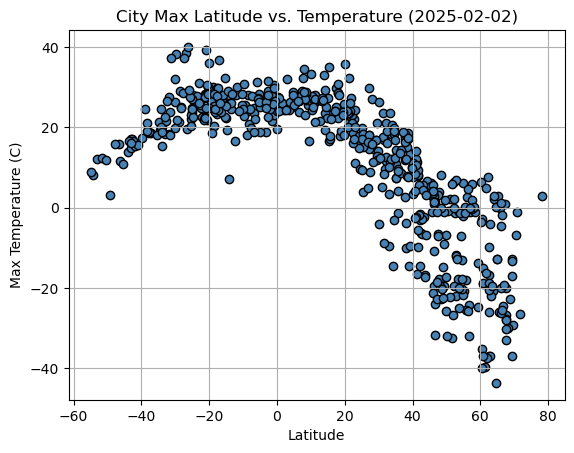

In [71]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

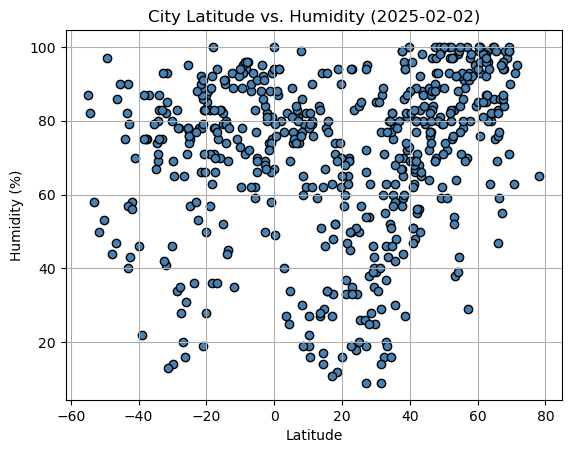

In [72]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

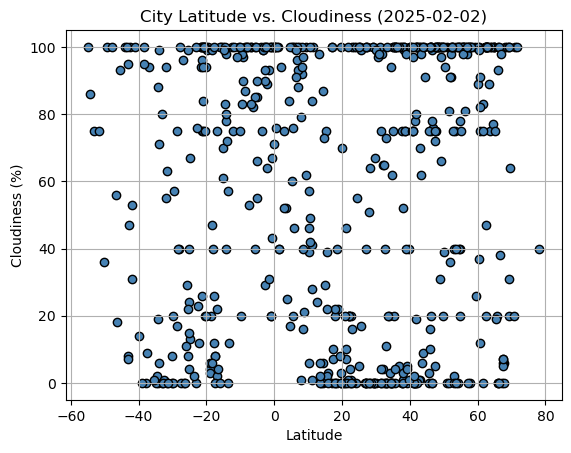

In [73]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

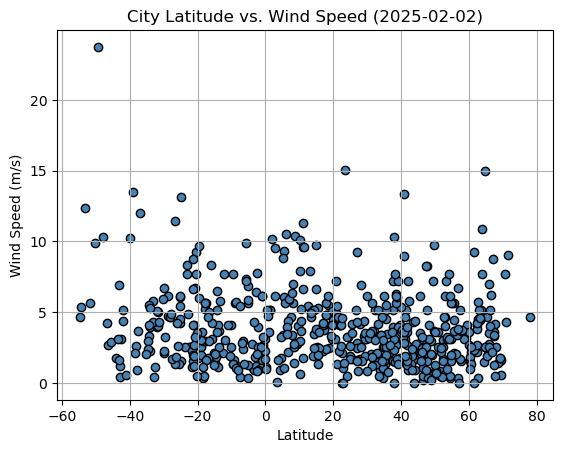

In [74]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", color = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, title):

    # perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # get regression values
    regression_values = slope * x_values + intercept

    # create the scatter plot
    plt.scatter(x_values, y_values, marker = "o", color = "steelblue")

    # label plot and annotate the line equation
    plt.plot(x_values, regression_values, color = "red")
  
    # print the equation in my graph (string)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    #plt.annotate(line_eq, (0, 0), fontsize = 15, color = "red")

    # set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show the plot
    plt.show() 

    # Return the r^2 value
    return rvalue**2 

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,-6.20,68,100,1.34,US,1738524277
3,batouri,4.4333,14.3667,25.06,25,84,0.88,CM,1738524762
4,colonia,50.9333,6.9500,2.20,72,0,2.57,DE,1738524590
6,wailua homesteads,22.0669,-159.3780,22.29,70,20,4.12,US,1738524765
8,bethel,41.3712,-73.4140,-2.44,63,0,3.60,US,1738524549


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.21,97,100,23.75,TF,1738524757
2,grytviken,-54.2811,-36.5092,8.14,82,86,5.35,GS,1738524761
5,mount isa,-20.7333,139.5000,21.87,83,100,6.69,AU,1738524764
7,port saint john's,-31.6229,29.5448,23.76,93,63,5.00,ZA,1738524767
10,edinburgh of the seven seas,-37.0676,-12.3116,18.62,87,94,12.04,SH,1738524771


###  Temperature vs. Latitude Linear Regression Plot

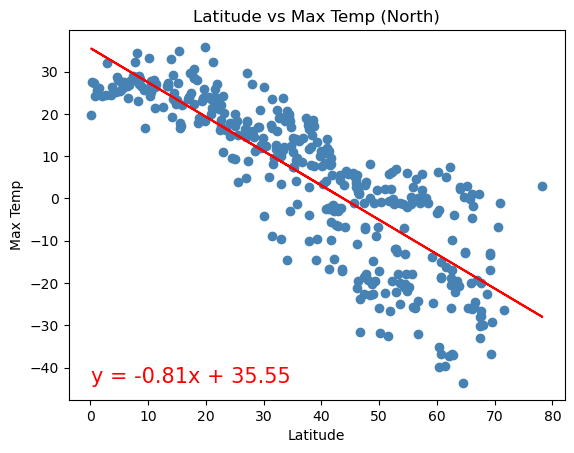

The r^2-value is: 0.7029880520682837


In [78]:
# Linear regression on Northern Hemisphere

# Call the function for linear regression plot
north_temp_lat = linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"],  
    "Latitude", 
    "Max Temp", 
    "Latitude vs Max Temp (North)")

plt.show()

print(f"The r^2-value is: {north_temp_lat}")


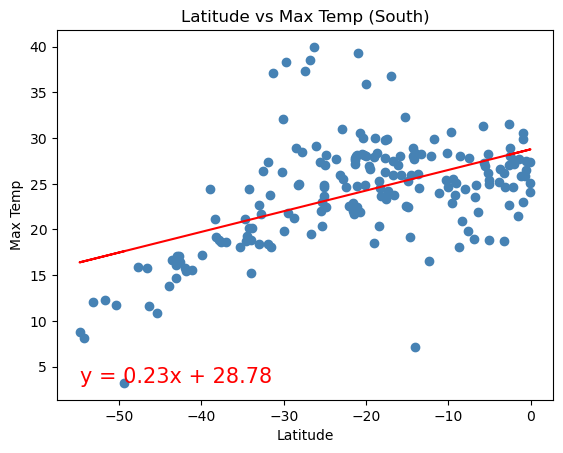

The r^2-value is: 0.2664401685444732


In [79]:
# Linear regression on Southern Hemisphere

# Call the function for linear regression plot
south_temp_lat = linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"],  
    "Latitude", 
    "Max Temp", 
    "Latitude vs Max Temp (South)")

plt.show()

print(f"The r^2-value is: {south_temp_lat}")


##### **Discussion about the linear relationship:** 
Looking at the northern hemisphere linear regression, I observed a moderately strong negative correlation: as you move north from the equator, the temperature tends to drop. The r² value of 0.79 tells me this relationship is a good model. The y-intercept of 35.55°C suggests that the temperature at the equator would be quite hot. The line's slope of -0.81 shows a significant decrease in temperature as you move north. I saw temperatures in the 60-80° latitude range dropping as low as -40°C, with one outlier at 80° N showing a temperature near 0°C.

For the southern hemisphere, I noticed a moderately weak positive correlation: temperatures near the equator tend to be warmer, but with an r² value of only 0.27, the relationship isn’t very strong. The data points are widely clustered around temperatures of 20-30°C and latitudes from -35° to 0°, with a noticeable dip into colder temperatures around latitudes of -35° to -50°. The majority of points are in the warmer temperature range.

Interestingly, more northern cities are experiencing colder temperatures than southern cities, which makes sense because the Northern Hemisphere is in its winter months. If I wanted to explore this further, I might analyze the percentage of northern vs. southern cities experiencing temperatures below 3°C, but I’m not diving that deep just yet.

Overall, the data supports the idea that latitude has a significant impact on temperature, with the Northern Hemisphere showing colder temperatures due to its winter season.

### Humidity vs. Latitude Linear Regression Plot

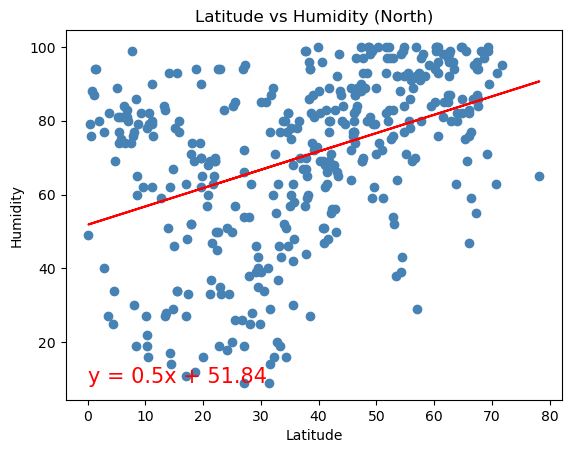

The r^2-value is: 0.1676326228016418


In [80]:
# Linear regression on Northern Hemisphere

# Call the function for linear regression plot
north_temp_lat = linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"],  
    "Latitude", 
    "Humidity", 
    "Latitude vs Humidity (North)")

plt.show()

print(f"The r^2-value is: {north_temp_lat}")

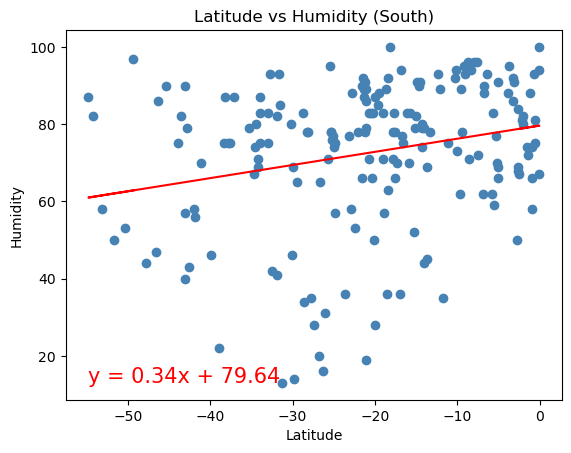

The r^2-value is: 0.05796377879445135


In [81]:
# Linear regression on Southern Hemisphere

# Call the function for linear regression plot
south_temp_lat = linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"],  
    "Latitude", 
    "Humidity", 
    "Latitude vs Humidity (South)")

plt.show()

print(f"The r^2-value is: {south_temp_lat}")

#### **Discussion about the linear relationship:** 
This was an interesting correlation, and both relationships turned out to be significantly weak. Initially, I noticed that the northern hemisphere has a weak correlation with an r² value of 0.18. The rate of change is 0.5, suggesting a positive correlation, which would indicate that the farther up north you go, the more humidity you will experience. This was a fascinating observation for me. I live in the northern hemisphere, so I always assumed that humidity is much lower during the winter months, but this plot suggests otherwise. It’s a bit of a surprise that humidity might increase as you move north—perhaps it’s a snowy moment, and the northern regions are seeing an uptick in humidity. Snowstorms and cold weather can actually add moisture to the air, even if it feels dry.

You can see this trend more clearly in the latitude range 35–80, where the humidity levels rarely dip below 40%. It’s also interesting that at the equator, humidity levels vary quite a bit. Between latitudes 0°–30°, the range of humidity spans from 0% to 100%, showing that not all cities near the equator are experiencing the same level of humidity. So, even though we think of the equator as consistently humid, the data tells us there's a lot more variability.

For the southern hemisphere, the correlation is almost nonexistent, with an r² value of 0.06. This tells us that latitude doesn't seem to have much of an effect on humidity in this region, so I wouldn’t say there’s a clear pattern. Even though the line of best fit has a rate of change of 0.34, which suggests that closer proximity to the equator leads to more humidity, the r² value is so low that this model isn’t showing a strong relationship.

Overall, it's clear that humidity is influenced by factors other than latitude—weather systems, local geography, and seasonal conditions are likely playing much larger roles. It’s worth considering that these factors might be contributing to the weak correlations we’re seeing. Even though the data from the northern hemisphere shows a slight positive trend, I wouldn’t conclude that latitude alone is driving these changes in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

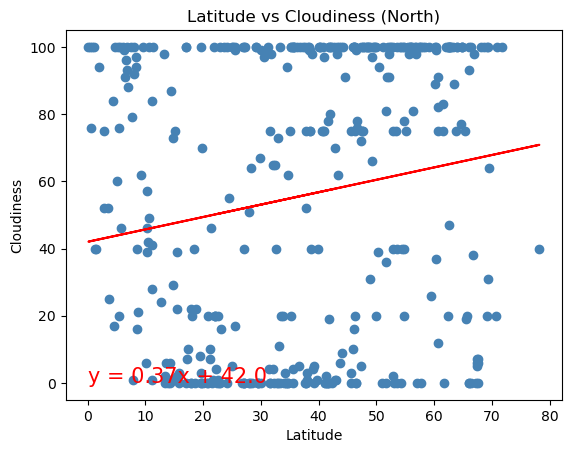

The r^2-value is: 0.027970553477181796


In [82]:
# Linear regression on Northern Hemisphere

# Call the function for linear regression plot
north_temp_lat = linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"],  
    "Latitude", 
    "Cloudiness", 
    "Latitude vs Cloudiness (North)")

plt.show()

print(f"The r^2-value is: {north_temp_lat}")

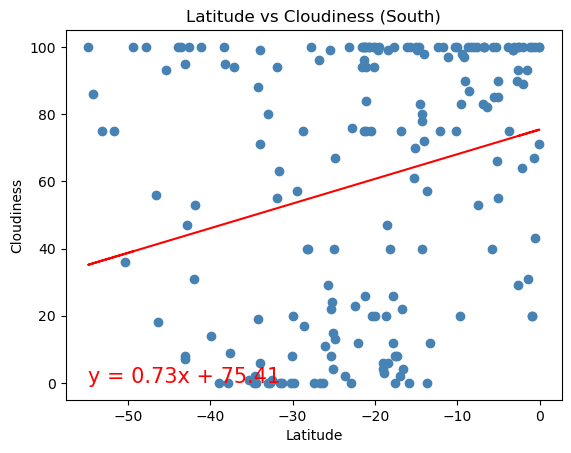

The r^2-value is: 0.06484327465989045


In [83]:
# Linear regression on Southern Hemisphere

# Call the function for linear regression plot
south_temp_lat = linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"],  
    "Latitude", 
    "Cloudiness", 
    "Latitude vs Cloudiness (South)")

plt.show()

print(f"The r^2-value is: {south_temp_lat}")

#### **Discussion about the linear relationship:** 
The correlation between latitude and cloudiness is significantly weak, with r² values of 0.02 for the northern hemisphere and 0.06 for the southern hemisphere. However, there are some interesting patterns to note. In the northern hemisphere, we see some intriguing clustering of cloudiness data. It seems like cities either have 0% cloud coverage or 100% cloud coverage, with very few data points in between. The points are heavily concentrated at the extremes, with many cities experiencing either clear skies or overcast conditions. This trend persists across all latitudes, from the equator to the higher latitudes.

In the southern hemisphere, the data is a bit more spread out, though there is still noticeable clustering. Between latitudes -20 and 0, many cities fall in the 100% cloudiness range, suggesting that cloud cover may be more consistent in that region. However, even with this additional insight, there’s still not enough of a clear pattern to draw definitive conclusions between latitude and cloudiness.

Overall, it’s safe to say that while there are some clusters, latitude doesn’t seem to be a strong predictor of cloudiness. Other weather systems or regional patterns might be influencing cloud coverage more than just the position relative to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

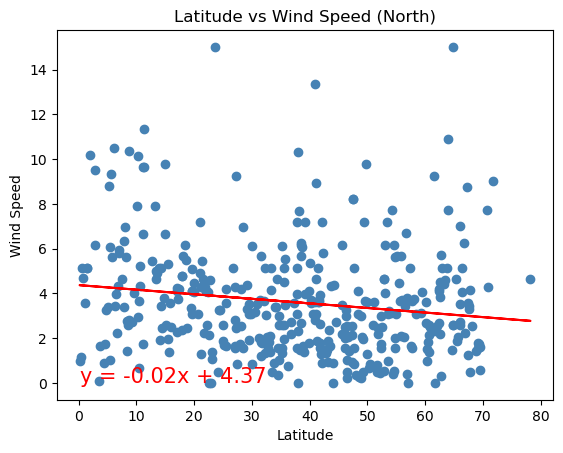

The r^2-value is: 0.02473224043591827


In [84]:
# Linear regression on Northern Hemisphere

# Call the function for linear regression plot
north_temp_lat = linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"],  
    "Latitude", 
    "Wind Speed", 
    "Latitude vs Wind Speed (North)")

plt.show()

print(f"The r^2-value is: {north_temp_lat}")

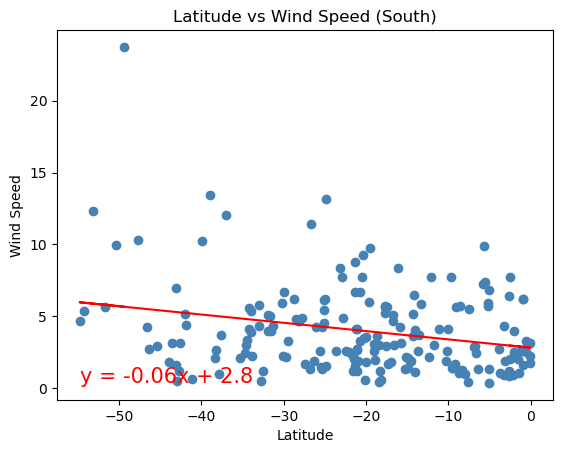

The r^2-value is: 0.0658338599977403


In [85]:
# Linear regression on Southern Hemisphere

# Call the function for linear regression plot
south_temp_lat = linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"],  
    "Latitude", 
    "Wind Speed", 
    "Latitude vs Wind Speed (South)")

plt.show()

print(f"The r^2-value is: {south_temp_lat}")

#### **Discussion about the linear relationship:** 
My final observation is regarding the relationship between latitude and wind speed, which shows a significantly weak correlation. In the northern hemisphere, the r² value is 0.02, indicating a very weak correlation. One interesting pattern I noticed is that there are fewer data points in the wind speed range of 8-12 m/s, suggesting that high wind speeds are not very common in the northern hemisphere. When we do see higher wind speeds, they tend to occur mostly between latitudes 0 and 30, but even in this region, the correlation remains weak.

In the southern hemisphere, the relationship is similarly weak, with an r² value of 0.07. Like the northern hemisphere, there aren't many high wind speeds. The data points mostly cluster in the 0-10 m/s range, showing that wind speeds in the south also lack strong variation.

Overall, wind speed doesn’t seem to correlate strongly with latitude in either hemisphere. While there are some small clusters of higher wind speeds near the equator, the overall pattern is not strong enough to make any definitive conclusions.